<a href="https://colab.research.google.com/github/FilipNim/MKA-MLF/blob/main/mka_mlf_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("Data_prepared_final.csv")
data = data.drop(data.columns[[0, 1]], axis=1)
print(data)

       cfo_meas   cfo_demod  gain_imb     iq_imb     or_off  quadr_err  \
0          -414 -421.076324  0.076097 -46.987598 -27.219631   0.104362   
1          -414 -423.571686  0.069879 -47.852627 -26.934967   0.053158   
2          -414 -421.033936  0.061466 -48.968697 -27.130722  -0.045913   
3          -414 -420.103546  0.078836 -46.756973 -27.005318   0.081583   
4          -432 -420.781097  0.066053 -47.048218 -27.358521   0.081920   
...         ...         ...       ...        ...        ...        ...   
19195       216  215.584991  0.077551 -35.409054 -28.611925   1.875334   
19196       216  215.247406  0.044961 -35.508205 -27.954048   1.898758   
19197       216  216.761307  0.070066 -35.038486 -28.467575   2.015116   
19198       216  215.353516  0.048611 -35.413639 -28.528139   1.916172   
19199       216  215.797363  0.063049 -35.693104 -28.132133   1.834771   

         ph_err   mag_err       evm  
0      1.129778  0.440299  2.059935  
1      1.050010  0.431240  1.815053

In [ ]:
data = StandardScaler().fit_transform(data)


(19000.0, 19200.0)

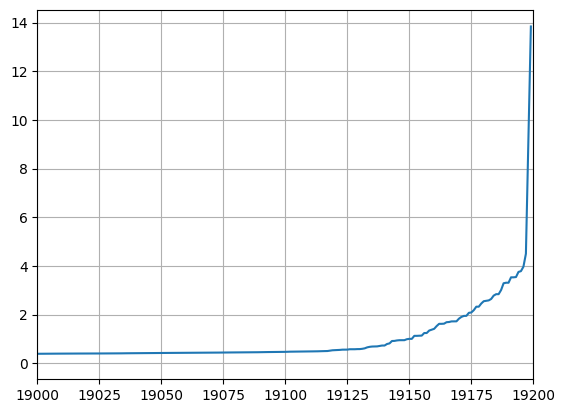

In [ ]:
neighbors = NearestNeighbors(n_neighbors=18) # n_neighbors -> 2*dimension of dataset
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlim([19000, 19200])

Number of transmitters: 2


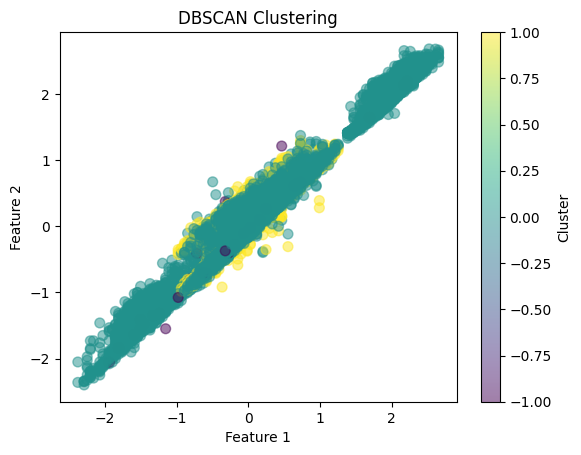

In [ ]:

# Volba parametrů DBSCAN
epsilon = 2  # Změňte podle vašich potřeb
min_samples = 18  # Změňte podle vašich potřeb

# Inicializace a použití DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(data)

# Získání přiřazených shluků pro každý řádek
clusters = dbscan.labels_

# Počet vysílačů (počet shluků kromě noise)
num_transmitters = len(set(clusters))- (1 if -1 in clusters else 0)
print("Number of transmitters:", num_transmitters)

plt.scatter(data[:, 0], data[:, 1],c=clusters, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()